# Telecom Churn

#### Using PCA + LogisticRegression
#### Using RandomForest

#### Best Features
    
    max_rech_amt_8
    loc_og_mou_8
    loc_og_t2m_mou_8
    roam_og_mou_8
    total_rech_amt_8
    std_og_mou_7
    vol_2g_mb_8
    vol_3g_mb_7
    vol_3g_mb_8
    total_rech_num_8
    loc_ic_t2t_mou_8
    roam_ic_mou_8

In [3]:

import pandas as pd
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [6]:
## Load dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [7]:
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

## Data Investigation 

In [8]:
telecom.shape

(99999, 226)

In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [11]:
print("\n********** \t Features \t *****************")
print("\nFeatures : \n", telecom.columns.tolist())
print("\n********** \t Missing Values \t *****************")
print("\nMissing values :\n", telecom.isnull().sum().values.sum())
print("\n********** \t Unique values \t *****************")
print ("\nUnique values :  \n",telecom.nunique())


********** 	 Features 	 *****************

Features : 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9'

## Missing values

In [12]:
print("\nMissing values :\n", telecom.isnull().sum().values.sum())


Missing values :
 3594931


In [13]:
telecom.circle_id.value_counts(dropna = False)
telecom.loc_og_t2o_mou.value_counts(dropna = False)
telecom.std_og_t2o_mou.value_counts(dropna = False)

 0.0    98981
NaN      1018
Name: std_og_t2o_mou, dtype: int64

In [14]:
telecom.last_date_of_month_6.value_counts(dropna = False)

6/30/2014    99999
Name: last_date_of_month_6, dtype: int64

In [15]:
round(100*(telecom.isnull().sum(axis = 0)/ len(telecom.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [16]:
## Columns which all have more that 70% missing values
telecom.loc[:,list(round(100*(telecom.isnull().sum(axis=0)/len(telecom.index)),2)>70)].columns


Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], dtype='object')

In [17]:
### Drop columns which has more than 70 % missing values
most_null_value_features = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
telecom_df = telecom.drop(most_null_value_features, axis=1)

In [19]:
round(100*(telecom_df.isnull().sum(axis = 0)/ len(telecom_df.index)),2)
#loc_og_t2o_mou
#std_og_t2o_mou
#loc_ic_t2o_mou
#last_date_of_month_7
#last_date_of_month_8
#last_date_of_month_9
#


mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [20]:
## Columns name which has unique values
telecom_df.loc[:,telecom_df.nunique().values == 1].columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], dtype='object')

In [21]:
### Drop columns which has only one unique value
Feature_has_unique_value = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
telecom_df = telecom_df.drop(Feature_has_unique_value , axis = 1)

In [22]:
telecom_df.head(30)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00

In [23]:
## Column name which contain "date" in column string
telecom_df.columns[telecom_df.columns.str.contains('date')]

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], dtype='object')

In [24]:
date_f = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [25]:
telecom_df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9','last_day_rch_amt_9','total_rech_amt_9']]
#telecom_df['total_rech_amt_9']

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_9,total_rech_amt_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,0,0
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014,0,121
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,358
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014,30,410
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014,50,200
5,6/19/2014,7/17/2014,8/24/2014,9/28/2014,0,130
6,6/28/2014,7/31/2014,8/28/2014,9/28/2014,24,141
7,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0
8,6/25/2014,7/31/2014,8/30/2014,9/30/2014,0,186
9,6/29/2014,7/23/2014,8/29/2014,9/20/2014,50,180


In [26]:
round(100*(telecom_df.isnull().sum(axis = 0)/ len(telecom_df.index)),2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8    

In [27]:
#telecom_df.onnet_mou_6.value_counts(dropna=False)
telecom_df.shape

(99999, 170)

In [31]:
### Backup of clean data
clean_tel = telecom_df.copy()

In [32]:
import numpy as np

In [34]:
clean_tel.shape

(99999, 170)

In [35]:
round(100*(clean_tel.isnull().sum(axis = 0)/ len(clean_tel.index)),2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8    

In [36]:
### No use of mobile no.

clean_tel = clean_tel.drop('mobile_number', axis =1)

In [37]:
clean_tel.describe(percentiles=[.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000

In [38]:
clean_tel[['total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_num_9',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'max_rech_amt_6',
'max_rech_amt_7',
'max_rech_amt_8',
'max_rech_amt_9']]

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9
0,4,3,2,6,362,252,252,0,252,252,252,0
1,4,9,11,5,74,384,283,121,44,154,65,50
2,5,4,2,7,168,315,116,358,86,200,86,100
3,10,11,18,14,230,310,601,410,60,50,50,50
4,5,6,3,4,196,350,287,200,56,110,110,50
5,2,2,3,3,120,0,130,130,120,0,130,130
6,15,10,11,7,499,222,294,141,90,37,50,30
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0
8,19,21,14,15,437,601,120,186,90,154,30,36
9,4,2,5,3,220,195,210,180,110,154,50,130


## Derive new features "good_Phase"

In [39]:
def avg_rech(a,b,c,d):
    total_number_recharge = a + b
    if total_number_recharge == 0:
        return total_number_recharge
    else:
        avg = round((c+d)/total_number_recharge,2)
        return avg

clean_tel['good_Phase'] = clean_tel.apply(lambda x : avg_rech(x.total_rech_num_6,x.total_rech_num_7,x.total_rech_amt_6,x.total_rech_amt_7), axis = 1)

In [40]:
clean_tel[['total_rech_num_6',
'total_rech_num_7',
'total_rech_num_8',
'total_rech_num_9',
'total_rech_amt_6',
'total_rech_amt_7',
'total_rech_amt_8',
'total_rech_amt_9',
'max_rech_amt_6',
'max_rech_amt_7',
'max_rech_amt_8',
'max_rech_amt_9',
'good_Phase']]

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,good_Phase
0,4,3,2,6,362,252,252,0,252,252,252,0,87.71
1,4,9,11,5,74,384,283,121,44,154,65,50,35.23
2,5,4,2,7,168,315,116,358,86,200,86,100,53.67
3,10,11,18,14,230,310,601,410,60,50,50,50,25.71
4,5,6,3,4,196,350,287,200,56,110,110,50,49.64
5,2,2,3,3,120,0,130,130,120,0,130,130,30.00
6,15,10,11,7,499,222,294,141,90,37,50,30,28.84
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0,237.00
8,19,21,14,15,437,601,120,186,90,154,30,36,25.95
9,4,2,5,3,220,195,210,180,110,154,50,130,69.17


In [41]:
clean_tel.good_Phase.describe(percentiles=[.7])

count    99999.000000
mean        48.214995
std         52.069370
min          0.000000
50%         36.570000
70%         56.330000
max       4010.000000
Name: good_Phase, dtype: float64

## Filter high-value customers on the base of  70th percentile

In [42]:
high_val_cust_df = clean_tel.loc[clean_tel['good_Phase'] >= 56.33]

In [43]:
high_val_cust_df.shape

(30004, 170)

In [44]:
high_val_cust_df[['total_ic_mou_9',
'total_og_mou_9',
'vol_2g_mb_9',
'vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
9,412.63,151.33,0.00,0.00
13,631.86,446.09,0.00,0.00
16,334.56,255.74,0.00,0.00
19,50.38,25.31,0.00,0.00
20,240.93,293.83,0.00,0.00
22,7.51,0.68,0.00,0.00
23,127.48,127.63,13.93,314.74
24,330.03,627.78,0.00,0.00


In [45]:
high_val_cust_df[((high_val_cust_df.total_ic_mou_9 == 0) & (high_val_cust_df.total_og_mou_9 == 0)) & ((high_val_cust_df.vol_2g_mb_9 == 0) & (high_val_cust_df.vol_3g_mb_9 == 0))][['total_ic_mou_9',
'total_og_mou_9',
'vol_2g_mb_9',
'vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0
144,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0
229,0.0,0.0,0.0,0.0


In [46]:
len(high_val_cust_df.index)/2609

11.500191644308163

## Tag churners

In [47]:
def label(a,b,c,d):
    if (((a == 0) & (b == 0)) & ((c == 0) & (d == 0))):
        return 1
    else :
        return 0
    

In [48]:
high_val_cust_df['label'] = high_val_cust_df.apply(lambda x : label(x['total_ic_mou_9'], x['total_og_mou_9'],x['vol_2g_mb_9'],x['vol_3g_mb_9']), axis =1)

In [49]:
high_val_cust_df[((high_val_cust_df.total_ic_mou_9 == 0) & (high_val_cust_df.total_og_mou_9 == 0)) & ((high_val_cust_df.vol_2g_mb_9 == 0) & (high_val_cust_df.vol_3g_mb_9 == 0))][['total_ic_mou_9',
'total_og_mou_9',
'vol_2g_mb_9',
'vol_3g_mb_9',
'label']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,label
0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,1
35,0.0,0.0,0.0,0.0,1
67,0.0,0.0,0.0,0.0,1
144,0.0,0.0,0.0,0.0,1
188,0.0,0.0,0.0,0.0,1
199,0.0,0.0,0.0,0.0,1
202,0.0,0.0,0.0,0.0,1
222,0.0,0.0,0.0,0.0,1
229,0.0,0.0,0.0,0.0,1



## Remove attributes of the churn phase

In [51]:
high_val_cust_df = high_val_cust_df.drop(high_val_cust_df.columns[high_val_cust_df.columns.str.contains('_9')],axis=1)

In [52]:
high_val_cust_df = high_val_cust_df.drop('sep_vbc_3g', axis =1)

In [53]:
high_val_cust_df.shape

(30004, 129)

In [54]:
round(100*(clean_tel.isnull().sum(axis = 0)/ len(clean_tel.index)),2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9    

In [55]:
high_val_cust_df.columns[high_val_cust_df.columns.str.contains('date')]

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [56]:
date_f = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [57]:
high_val_cust_df[date_f]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014
9,6/29/2014,7/23/2014,8/29/2014
13,6/20/2014,7/22/2014,8/30/2014
16,6/30/2014,7/31/2014,8/14/2014
19,6/27/2014,7/25/2014,8/26/2014
20,6/14/2014,7/10/2014,8/27/2014
22,6/19/2014,7/3/2014,8/28/2014
23,6/18/2014,7/7/2014,8/24/2014
24,6/23/2014,7/17/2014,8/31/2014


In [58]:
## Date column is not significant to predict customer status 
high_val_cust_df = high_val_cust_df.drop(date_f, axis =1)

In [59]:
features_6 = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('_6')]
features_6 
#= ['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'date_of_last_rech_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6']

Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6'], dtype='object')

In [60]:
round(100*(high_val_cust_df[features_6].isnull().sum(axis = 0)/ len(high_val_cust_df[features_6].index)),2)

arpu_6                0.0
onnet_mou_6           3.3
offnet_mou_6          3.3
roam_ic_mou_6         3.3
roam_og_mou_6         3.3
loc_og_t2t_mou_6      3.3
loc_og_t2m_mou_6      3.3
loc_og_t2f_mou_6      3.3
loc_og_t2c_mou_6      3.3
loc_og_mou_6          3.3
std_og_t2t_mou_6      3.3
std_og_t2m_mou_6      3.3
std_og_t2f_mou_6      3.3
std_og_mou_6          3.3
isd_og_mou_6          3.3
spl_og_mou_6          3.3
og_others_6           3.3
total_og_mou_6        0.0
loc_ic_t2t_mou_6      3.3
loc_ic_t2m_mou_6      3.3
loc_ic_t2f_mou_6      3.3
loc_ic_mou_6          3.3
std_ic_t2t_mou_6      3.3
std_ic_t2m_mou_6      3.3
std_ic_t2f_mou_6      3.3
std_ic_mou_6          3.3
total_ic_mou_6        0.0
spl_ic_mou_6          3.3
isd_ic_mou_6          3.3
ic_others_6           3.3
total_rech_num_6      0.0
total_rech_amt_6      0.0
max_rech_amt_6        0.0
last_day_rch_amt_6    0.0
vol_2g_mb_6           0.0
vol_3g_mb_6           0.0
monthly_2g_6          0.0
sachet_2g_6           0.0
monthly_3g_6

In [61]:
high_val_cust_df[features_6].describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
count,30004.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,30004.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,29015.000000,30004.000000,29015.000000,29015.000000,29015.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000
mean,476.936315,223.084399,340.823623,16.373471,26.716131,82.949259,163.998742,7.988528,1.059337,254.945504,129.824063,144.713175,2.468514,277.009485,2.198907,3.885703,0.279948,520.582987,62.047103,146.354149,17.182054,225.593282,13.307208,28.046699,3.553550,44.911034,273.979818,0.055633,11.707559,1.042955,6.424043,569.027030,192.484435,127.532496,67.459125,247.981134,0.148114,0.144814,0.186075,0.063891
std,462.281253,413.526621,442.134497,73.606899,113.838304,206.766530,232.664052,23.448754,4.762174,350.600949,358.739409,367.102938,13.152586,549.669822,46.469157,14.614787,1.392474,632.975268,139.077106,199.581543,46.483074,282.090598,60.668798,88.390424,21.698681,120.426520,330.118896,0.141624,84.764855,13.368915,4.647541,565.177324,174.047913,145.932645,258.649728,812.885871,0.398635,0.557460,0.569537,0.372563
min,-2258.709000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.776000,23.640000,92.190000,0.000000,0.000000,6.740000,27.835000,0.000000,0.000000,49.120000,0.000000,0.000000,0.000000,1.350000,0.000000,0.000000,0.000000,131.617500,7.230000,31.930000,0.000000,55.300000,0.000000,0.000000,0.000000,1.330000,73.125000,0.000000,0.000000,0.000000,3.000000,255.000000,110.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.077500,80.190000,207.260000,0.000000,0.000000,29.790000,90.930000,0.850000,0.000000,149.240000,1.690000,14.390000,0.000000,36.590000,0.000000,0.000000,0.000000,321.710000,26.860000,88.290000,2.780000,143.610000,0.180000,5.030000,0.000000,11.580000,182.040000,0.000000,0.000000,0.000000,5.000000,450.000000,128.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,605.835250,226.710000,416.330000,0.000000,0.000000,83.740000,211.065000,7.010000,0.000000,328.000000,68.630000,110.025000,0.000000,297.305000,0.000000,2.310000,0.000000,672.850000,69.360000,187.235000,15.260000,293.945000,7.380000,23.310000,0.560000,41.050000,357.222500,0.000000,0.000000,0.000000,8.000000,727.000000,250.000000,145.000000,6.642500,0.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,7376.710000,8362.360000,2589.090000,3775.110000,6431.330000,4729.740000,1466.030000,209.880000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,100.610000,10674.030000,6351.440000,4450.740000,1678.410000,6496.110000,3038.340000,4630.230000,1351.110000,4840.330000,7074.590000,3.560000,6789.410000,1362.940000,80.000000,35190.000000,4010.000000,4010.000000,10285.900000,45735.400000,4.000000,14.000000,11.000000,14.000000


In [62]:
features_7 = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('_7')]
features_7

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7'], dtype='object')

In [63]:
high_val_cust_df[features_7].describe()

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,last_day_rch_amt_7,vol_2g_mb_7,vol_3g_mb_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7
count,30004.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,30004.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,29069.000000,30004.000000,29069.000000,29069.000000,29069.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000,30004.000000
mean,472.422610,223.297344,339.633420,12.713541,20.061001,82.991965,161.691281,8.054896,1.194022,252.747094,132.513714,149.912686,2.482051,284.912103,2.155107,4.497534,0.046399,527.401768,63.165523,146.109045,18.153918,227.438497,13.950807,29.481676,3.645891,47.081966,279.489734,0.013399,12.662172,1.275934,6.008466,560.502566,193.735935,121.268964,65.933743,264.960524,0.150313,0.160912,0.198240,0.065025
std,485.121606,425.418365,456.953793,70.549347,93.999328,214.166289,224.609702,23.371624,5.382762,345.627611,368.281238,388.886830,14.323645,575.578737,46.230376,18.148214,2.826493,655.240892,155.721199,195.395325,50.557711,288.353886,65.524807,96.904514,21.687466,130.436597,341.851066,0.092246,88.538924,11.716406,4.488962,590.494099,181.392958,144.376319,254.924062,809.613880,0.406349,0.646938,0.621281,0.409619
min,-2014.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,213.990500,21.560000,85.080000,0.000000,0.000000,6.680000,27.760000,0.000000,0.000000,48.840000,0.000000,0.000000,0.000000,0.810000,0.000000,0.000000,0.000000,123.937500,7.410000,33.110000,0.000000,58.380000,0.000000,0.000000,0.000000,1.240000,77.510000,0.000000,0.000000,0.000000,3.000000,250.000000,110.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,366.350000,75.260000,200.310000,0.000000,0.000000,29.040000,91.330000,0.890000,0.000000,149.690000,1.400000,13.230000,0.000000,32.830000,0.000000,0.000000,0.000000,317.280000,27.240000,88.810000,2.980000,144.880000,0.200000,4.950000,0.000000,11.860000,185.070000,0.000000,0.000000,0.000000,5.000000,440.000000,145.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,604.256250,221.780000,415.190000,0.000000,0.000000,82.960000,207.430000,7.030000,0.000000,323.010000,66.840000,107.210000,0.000000,300.510000,0.000000,3.180000,0.000000,686.030000,69.930000,187.690000,15.580000,295.390000,7.610000,24.240000,0.610000,42.580000,361.882500,0.000000,0.000000,0.000000,8.000000,726.000000,250.000000,150.000000,6.042500,0.000000,0.000000,0.000000,0.000000,0.000000
max,35145.834000,8157.780000,9667.130000,2877.060000,2812.040000,7400.660000,4557.140000,1196.430000,269.490000,7674.780000,8133.660000,9284.740000,544.630000,10936.730000,5490.280000,1265.790000,370.130000,11365.310000,9324.660000,4027.030000,1983.010000,9669.910000,4235.340000,3097.160000,1136.080000,4323.530000,9699.010000,6.430000,5289.540000,816.480000,58.000000,40335.000000,4010.000000,4010.000000,7873.550000,28144.120000,5.000000,11.000000,16.000000,18.000000


In [64]:
data1= high_val_cust_df.fillna(0.0) 

In [65]:
data1.isnull().any()

arpu_6                False
arpu_7                False
arpu_8                False
onnet_mou_6           False
onnet_mou_7           False
onnet_mou_8           False
offnet_mou_6          False
offnet_mou_7          False
offnet_mou_8          False
roam_ic_mou_6         False
roam_ic_mou_7         False
roam_ic_mou_8         False
roam_og_mou_6         False
roam_og_mou_7         False
roam_og_mou_8         False
loc_og_t2t_mou_6      False
loc_og_t2t_mou_7      False
loc_og_t2t_mou_8      False
loc_og_t2m_mou_6      False
loc_og_t2m_mou_7      False
loc_og_t2m_mou_8      False
loc_og_t2f_mou_6      False
loc_og_t2f_mou_7      False
loc_og_t2f_mou_8      False
loc_og_t2c_mou_6      False
loc_og_t2c_mou_7      False
loc_og_t2c_mou_8      False
loc_og_mou_6          False
loc_og_mou_7          False
loc_og_mou_8          False
std_og_t2t_mou_6      False
std_og_t2t_mou_7      False
std_og_t2t_mou_8      False
std_og_t2m_mou_6      False
std_og_t2m_mou_7      False
std_og_t2m_mou_8    

In [66]:
data1.shape

(30004, 126)

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30004 entries, 0 to 99998
Columns: 126 entries, arpu_6 to label
dtypes: float64(100), int64(26)
memory usage: 29.1 MB


In [68]:
data1.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_Phase,label
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,87.71,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,237.00,1
9,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.16,78.34,0.00,0.00,0.00,0.00,0.00,0.00,33.89,30.11,22.43,38.03,40.06,34.93,0.00,0.00,0.00,0.00,0.00,0.00,71.93,70.18,57.36,0.00,0.00,0.00,25.45,14.09,43.41,0.00,0.00,0.00,25.45,14.09,43.41,0.0,0.00,0.00,0.66,0.00,0.00,0.0,0.0,0.0,98.04,84.28,100.78,129.34,124.34,49.93,132.94,96.24,122.58,0.40,0.00,0.00,262.69,220.59,172.51,0.30,0.00,0.00,32.86,78.21,1.74,0.00,0.00,0.00,33.16,78.21,1.74,303.98,327.31,219.86,0.00,0.0,0.0,8.11,28.49,45.59,0.00,0.00,0.00,4,2,5,220,195,210,110,154,50,110,154,30,0.00,7.37,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,902,0.00,0.00,0.00,69.17,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.0,0.

## Univariate EDA 

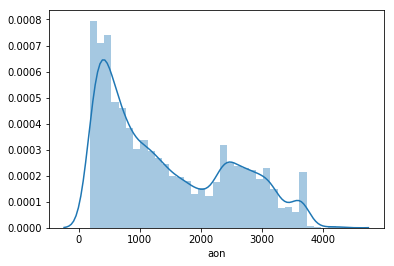

In [69]:
sns.distplot(data1['aon'])

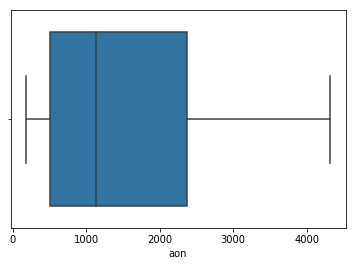

In [70]:
sns.boxplot(data1['aon'])

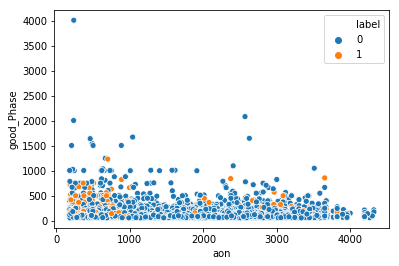

In [71]:
sns.scatterplot(y = 'good_Phase', x = 'aon',hue = 'label', data = data1)

In [72]:
avg_rev_per_user = data1.columns[data1.columns.str.contains('arpu')]
avg_rev_per_user

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [73]:
data1[['arpu_6', 'arpu_7', 'arpu_8','label']]

,arpu_6,arpu_7,arpu_8,label
0,197.385,214.816,213.803,1
7,1069.180,1349.850,3171.480,1
9,119.518,247.435,170.231,0
13,492.846,205.671,593.260,0
16,430.975,299.869,187.894,0
19,163.430,241.218,326.920,0
20,271.699,421.474,364.251,0
22,281.076,26.291,0.000,0
23,74.350,193.897,366.966,0
24,422.050,359.730,354.793,0


In [74]:
val = data1["label"].value_counts().values.tolist()

In [75]:
print(val)
print(sum(val))

[27395, 2609]
30004


In [76]:
lab = data1["label"].value_counts().keys().tolist()

In [77]:
lab

[0, 1]

## Check imbalance in data set

In [78]:
trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## Bivariate analysis

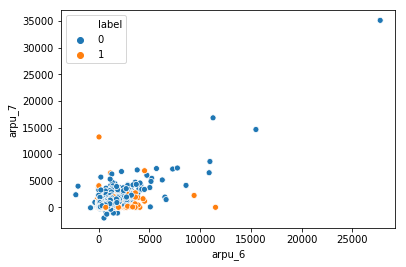

In [79]:
sns.scatterplot(x = 'arpu_6',y = 'arpu_7', hue='label', data = data1)

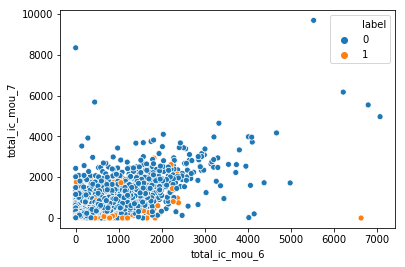

In [80]:
sns.scatterplot(x = 'total_ic_mou_6',y = 'total_ic_mou_7', hue='label', data = data1)

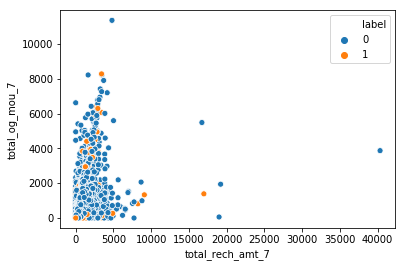

In [81]:
sns.scatterplot(x = 'total_rech_amt_7',y = 'total_og_mou_7', hue='label', data = data1)

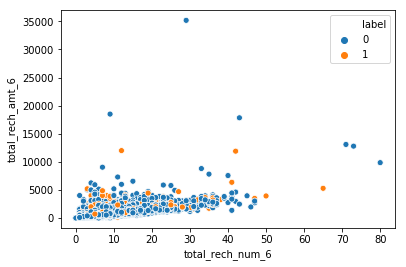

In [82]:
#x.total_rech_num_6,x.total_rech_num_7,x.total_rech_amt_6,x.total_rech_amt_7
sns.scatterplot(x = 'total_rech_num_6',y = 'total_rech_amt_6', hue='label', data = data1)

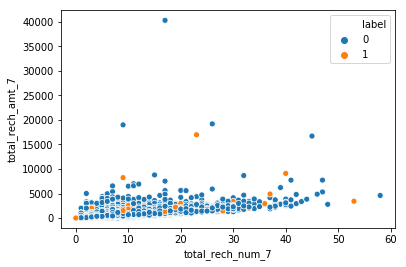

In [83]:
sns.scatterplot(x = 'total_rech_num_7',y = 'total_rech_amt_7', hue='label', data = data1)

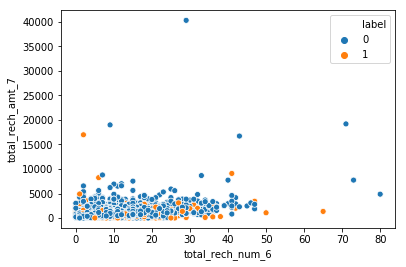

In [84]:
sns.scatterplot(x = 'total_rech_num_6',y = 'total_rech_amt_7', hue='label', data = data1)


## Remove Outliers

In [85]:
## Handel outliers
data2 = data1[data1['total_rech_amt_7'] < 20000]

In [86]:
data2.shape

(30003, 126)

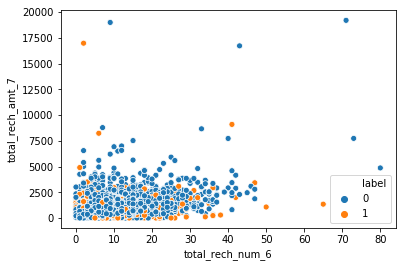

In [87]:
sns.scatterplot(x = 'total_rech_num_6',y = 'total_rech_amt_7', hue='label', data = data2)

# Resampling Techniques for imblance data
### Oversampling Minority Class

In [88]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()


In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
y = data2.label
X = data2.drop('label', axis=1)

In [127]:
scaled_data = standard_scaler.fit_transform(X)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25, random_state=27)

In [271]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22502, 126)
(7501, 126)
(22502,)
(7501,)


In [272]:
sm = SMOTE(random_state=27, ratio=1.0)

In [273]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [274]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.8317557658978803

In [275]:
f1_score(y_test, smote_pred)

0.45697074010327027

In [277]:
# confustion matrix
#pd.DataFrame(confusion_matrix(y_test, smote_pred))

## Make base accuracy Score

In [278]:
recall_score(y_test, smote_pred)

0.8509615384615384

In [279]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41034, 126)
(7501, 126)
(41034,)
(7501,)


## PCA

In [280]:
## initialize model
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized' , random_state = 42)


In [281]:
## Train the model
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [282]:
pca.components_

array([[ 1.77104841e-01,  1.96670175e-01,  1.62456229e-01, ...,
         1.56136759e-02,  1.48971096e-02,  3.54964371e-02],
       [-2.92931793e-02,  9.96312372e-03,  6.70033600e-02, ...,
         6.88803862e-02,  2.41458292e-02,  6.18296196e-02],
       [ 1.21748196e-01,  1.47985414e-01,  1.28271338e-01, ...,
         9.34347224e-02,  2.78065376e-02,  1.41603002e-01],
       ...,
       [-2.55049650e-07,  6.76823680e-08,  3.02320394e-08, ...,
         1.23369929e-07, -6.00187486e-09,  4.41003029e-09],
       [ 4.08950263e-07, -4.80424967e-07, -3.91360143e-08, ...,
        -8.97257285e-08,  2.41710492e-08,  1.13572530e-07],
       [ 3.06859233e-07, -5.28559974e-08,  2.84754584e-07, ...,
         3.06911468e-08,  2.37589429e-09,  2.11080114e-08]])

In [283]:
colnames = list(X.columns)

In [284]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.177105,-0.029293,arpu_6
1,0.196670,0.009963,arpu_7
2,0.162456,0.067003,arpu_8
3,0.139148,-0.148552,onnet_mou_6
4,0.141043,-0.118578,onnet_mou_7
5,0.117244,-0.049191,onnet_mou_8
6,0.186933,-0.105872,offnet_mou_6
7,0.188388,-0.072905,offnet_mou_7
8,0.144001,0.008095,offnet_mou_8
9,0.028379,-0.021313,roam_ic_mou_6


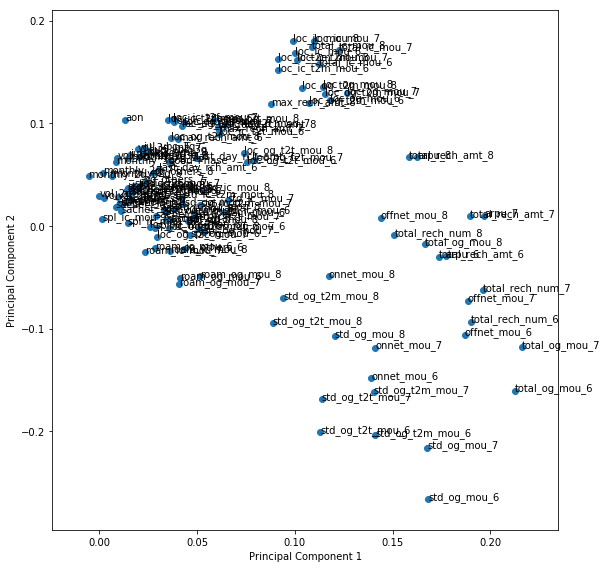

In [285]:
## Visualize Features using PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [286]:

pca.explained_variance_ratio_

array([1.36447451e-01, 8.19715622e-02, 5.55271164e-02, 4.54595838e-02,
       4.19960926e-02, 3.81377445e-02, 3.70800210e-02, 3.12854559e-02,
       2.86016142e-02, 2.42681527e-02, 2.11750959e-02, 2.02301350e-02,
       1.90615436e-02, 1.75383334e-02, 1.63490708e-02, 1.56726588e-02,
       1.49973363e-02, 1.41067576e-02, 1.34529600e-02, 1.26884297e-02,
       1.25012445e-02, 1.10375118e-02, 1.04852550e-02, 9.89924558e-03,
       9.34697794e-03, 8.97565732e-03, 8.83946491e-03, 8.61415245e-03,
       8.30671299e-03, 8.21150208e-03, 7.78929740e-03, 7.28048446e-03,
       7.08212335e-03, 6.71032902e-03, 6.54555311e-03, 6.49793394e-03,
       6.26318830e-03, 6.17587775e-03, 5.92942120e-03, 5.86062255e-03,
       5.78601326e-03, 5.58935532e-03, 5.42379202e-03, 5.28937432e-03,
       5.12674703e-03, 4.98000216e-03, 4.95818957e-03, 4.46037293e-03,
       4.35330390e-03, 4.33551601e-03, 4.00887948e-03, 3.88613477e-03,
       3.58813874e-03, 3.50802995e-03, 3.47441790e-03, 3.40076393e-03,
      

## 'cumulative explained variance' 
### Curve infer that max variance components are 40

Text(0,0.5,'cumulative explained variance')

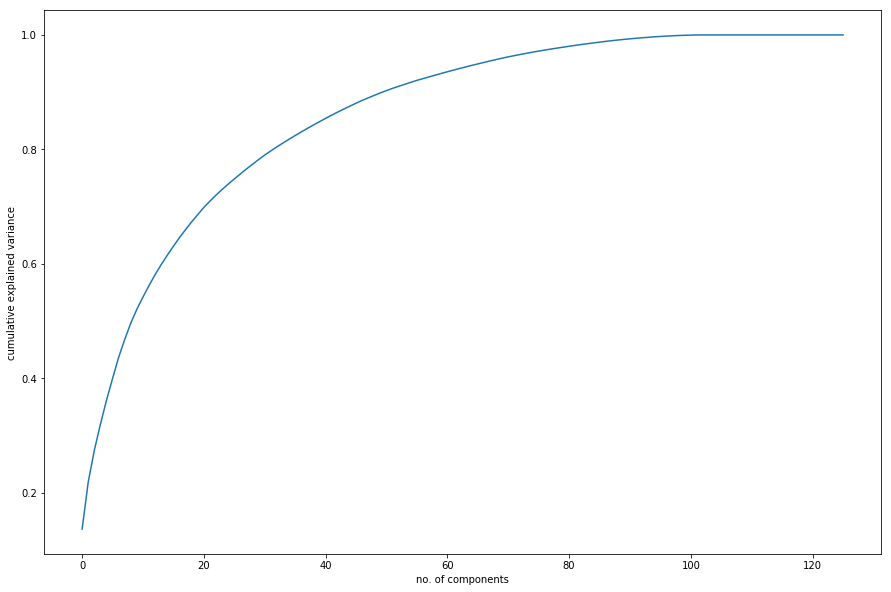

In [287]:
## PCA cumulative 
%matplotlib inline
fig = plt.figure(figsize = (15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no. of components")
plt.ylabel("cumulative explained variance")

In [288]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [289]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(41034, 40)

In [290]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [291]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.024317140811223346 , min corr:  -0.037269220124394466


In [292]:
### Apply PCA on X_test data set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(7501, 40)

# Logistic regression for classification 

In [293]:
### Import logisticRegression Liberary 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [294]:
## Training model
loginstic_PCA = LogisticRegression()
model_pca = loginstic_PCA.fit(df_train_pca,y_train)


In [295]:
## Testing of trained model using test data
pred_on_test = model_pca.predict(df_test_pca)

In [296]:
### check accuracy of trained model on test dataset
print(accuracy_score(y_test, pred_on_test))
print(f1_score(y_test, pred_on_test))

0.8268230902546327
0.4469987228607919


In [297]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, pred_on_test))
print(recall_score(y_test, pred_on_test))

0.30434782608695654
0.8413461538461539


In [298]:
### Find churn probability
pred_prob_on_train = model_pca.predict_proba(df_train_pca)

In [299]:
pred_prob_on_train

array([[0.99382464, 0.00617536],
       [0.93020018, 0.06979982],
       [0.1879133 , 0.8120867 ],
       ...,
       [0.40206913, 0.59793087],
       [0.41026122, 0.58973878],
       [0.80752212, 0.19247788]])

In [300]:
churn_prob = pred_prob_on_train[: , 1]
churn_prob

array([0.00617536, 0.06979982, 0.8120867 , ..., 0.59793087, 0.58973878,
       0.19247788])

### Predict on Training set

In [303]:
train_predict = model_pca.predict(df_train_pca)
print(train_predict)

[0 0 1 ... 1 1 0]


In [305]:
#cf= confusion_matrix(y_train,train_predict)

In [227]:
cf

array([[20271,   246],
       [ 1513,   472]], dtype=int64)

In [306]:
k = model_pca.score(df_train_pca, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.8447872495978944


In [307]:
import sklearn.metrics as skm
print(skm.classification_report( y_train , train_predict ))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     20517
           1       0.83      0.87      0.85     20517

    accuracy                           0.84     41034
   macro avg       0.85      0.84      0.84     41034
weighted avg       0.85      0.84      0.84     41034



### Running model on test dataset

In [309]:
test_predict = model_pca.predict(df_test_pca)
print(test_predict)

[1 0 1 ... 0 1 1]


In [310]:
import sklearn.metrics as skm
print(skm.classification_report( y_test, test_predict))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6877
           1       0.30      0.84      0.45       624

    accuracy                           0.83      7501
   macro avg       0.64      0.83      0.67      7501
weighted avg       0.93      0.83      0.86      7501



In [311]:
k = model_pca.score(df_test_pca, y_test)
print('the Accuracy on the test set come out to be : ' + str(k))

the Accuracy on the test set come out to be : 0.8268230902546327


## Probability of churn set

In [315]:
churn_df = pd.DataFrame({'Churn':y_train, 'Churn_Prob':churn_prob})
#churn_df['id'] = y_train.index
churn_df.head()

,Churn,Churn_Prob
0,0,0.006175
1,0,0.069800
2,0,0.812087
3,1,0.759580
4,0,0.051376


In [316]:
churn_df['Churn_Prob'] = churn_df['Churn_Prob'].apply(lambda x : round(x,2))

In [317]:
churn_df.head()

,Churn,Churn_Prob
0,0,0.01
1,0,0.07
2,0,0.81
3,1,0.76
4,0,0.05


In [318]:
churn_df[churn_df['Churn'] == 1]

,Churn,Churn_Prob
3,1,0.76
10,1,0.57
12,1,0.90
36,1,0.66
37,1,0.24
39,1,0.87
40,1,0.93
44,1,0.85
58,1,0.18
68,1,0.93


In [319]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    churn_df[i]= churn_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
churn_df.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,1,0,0,0,0,0,0,0,0,0
1,0,0.07,1,0,0,0,0,0,0,0,0,0
2,0,0.81,1,1,1,1,1,1,1,1,1,0
3,1,0.76,1,1,1,1,1,1,1,1,0,0
4,0,0.05,1,0,0,0,0,0,0,0,0,0


In [322]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(churn_df.Churn, churn_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.555807  0.996101  0.115514
0.1   0.1  0.693157  0.969196  0.417118
0.2   0.2  0.754423  0.947946  0.560901
0.3   0.3  0.797899  0.927718  0.668080
0.4   0.4  0.826290  0.901643  0.750938
0.5   0.5  0.845299  0.871765  0.818833
0.6   0.6  0.851733  0.828532  0.874933
0.7   0.7  0.829312  0.737778  0.920846
0.8   0.8  0.761954  0.567042  0.956865
0.9   0.9  0.605668  0.226349  0.984988


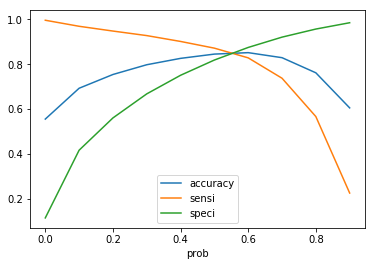

In [323]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [324]:
churn_df['prediction'] = churn_df.Churn_Prob.map(lambda x : 1 if x > 0.6 else 0)
churn_df

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,prediction
0,0,0.01,1,0,0,0,0,0,0,0,0,0,0
1,0,0.07,1,0,0,0,0,0,0,0,0,0,0
2,0,0.81,1,1,1,1,1,1,1,1,1,0,1
3,1,0.76,1,1,1,1,1,1,1,1,0,0,1
4,0,0.05,1,0,0,0,0,0,0,0,0,0,0
5,0,0.34,1,1,1,1,0,0,0,0,0,0,0
6,0,0.56,1,1,1,1,1,1,0,0,0,0,0
7,0,0.01,1,0,0,0,0,0,0,0,0,0,0
8,0,0.07,1,0,0,0,0,0,0,0,0,0,0
9,0,0.10,1,0,0,0,0,0,0,0,0,0,0


In [325]:
confusion_matrix = metrics.confusion_matrix(churn_df.Churn, churn_df.prediction)
confusion_matrix

array([[17951,  2566],
       [ 3518, 16999]], dtype=int64)

In [326]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [327]:
# Let's check the overall accuracy.
metrics.accuracy_score(churn_df.Churn, churn_df.prediction)

0.8517327094604474

# ROC Curve

In [328]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [329]:
fpr, tpr, thresholds = metrics.roc_curve( churn_df.Churn, churn_df.Churn_Prob, drop_intermediate = False )

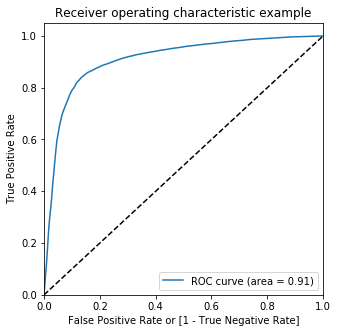

In [330]:
draw_roc(churn_df.Churn, churn_df.Churn_Prob)




#
# RandomForestClassifier

#
#







In [91]:
y = data2.label
X = data2.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [92]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [93]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
# Making predictions
predictions = rfc.predict(X_test)

In [95]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8240
           1       0.78      0.51      0.62       761

    accuracy                           0.95      9001
   macro avg       0.87      0.75      0.80      9001
weighted avg       0.94      0.95      0.94      9001



In [96]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[8132  108]
 [ 371  390]]
0.9467836907010332


In [97]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7496883890639551

# Tune hyperparameter

## N_estimators

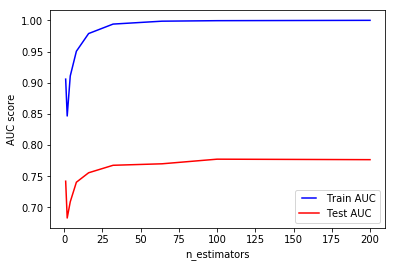

In [383]:
## N_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## max_depth

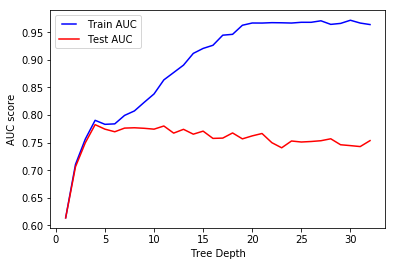

In [387]:
## max_depth
max_depths = np.linspace(1,32,32, endpoint = True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth= max_depth, n_jobs = -1)
    rf.fit(X_train , y_train)
    
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree Depth')
plt.show()
    

## GridSearchCV to find optimal Max_depth

In [405]:
# GridSearchCV to find optimal Max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': np.linspace(1,32,32, endpoint = True)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [406]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.157310,0.019086,0.013992,0.004145,1,{'max_depth': 1.0},0.911926,0.911926,0.911926,0.937619,0.929269,0.920531,0.010867,32,0.912029,0.912029,0.912029,0.939650,0.925668,0.920281,0.011031
1,0.294031,0.056051,0.011793,0.001326,2,{'max_depth': 2.0},0.943347,0.929065,0.939776,0.940952,0.945463,0.939720,0.005678,31,0.944468,0.929409,0.942087,0.943162,0.944593,0.940744,0.005741
2,0.329012,0.029427,0.011793,0.001165,3,{'max_depth': 3.0},0.942633,0.942157,0.950726,0.943810,0.946416,0.945148,0.003156,17,0.944408,0.945896,0.945777,0.945959,0.948164,0.946041,0.001206
3,0.357794,0.017777,0.012393,0.001199,4,{'max_depth': 4.0},0.946441,0.945489,0.950012,0.948095,0.945463,0.947100,0.001742,3,0.948039,0.948813,0.947265,0.947625,0.946736,0.947695,0.000704
4,0.447142,0.026266,0.012394,0.003380,5,{'max_depth': 5.0},0.947155,0.945489,0.949060,0.948095,0.946178,0.947196,0.001283,2,0.949348,0.949229,0.947325,0.949113,0.948343,0.948672,0.000760


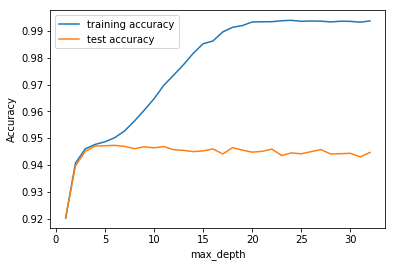

In [407]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [408]:
bst_score = rf.best_score_
bst_hp   = rf.best_params_
print("best Score", bst_score)
print("Best Parameter", bst_hp)

best Score 0.9473383487286925
Best Parameter {'max_depth': 6.0}


# GridSearchCV to find optimal n_estimators

In [409]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200,250,300, 350, 400]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=6)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [410]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092776,0.002991,0.007998,0.000002,1,{'n_estimators': 1},0.940014,0.940728,0.943823,0.940476,0.940224,0.941053,0.001406,13,0.942503,0.946908,0.947860,0.946733,0.945724,0.945946,0.001850
1,0.150205,0.011897,0.008000,0.000001,2,{'n_estimators': 2},0.941681,0.941204,0.942157,0.943810,0.943796,0.942529,0.001082,12,0.947265,0.948634,0.947027,0.950304,0.950128,0.948672,0.001376
2,0.242068,0.017677,0.010004,0.002216,4,{'n_estimators': 4},0.946441,0.942157,0.948822,0.946667,0.949035,0.946624,0.002475,10,0.951312,0.949765,0.949110,0.950244,0.949830,0.950052,0.000727
3,0.419694,0.038428,0.011199,0.001600,8,{'n_estimators': 8},0.946441,0.944537,0.949536,0.945952,0.946178,0.946529,0.001642,11,0.950301,0.951253,0.948753,0.951077,0.950009,0.950279,0.000893
4,0.768606,0.021962,0.015999,0.000002,16,{'n_estimators': 16},0.946441,0.945489,0.950250,0.948333,0.949035,0.947910,0.001729,3,0.949884,0.951610,0.950122,0.949708,0.951199,0.950505,0.000758


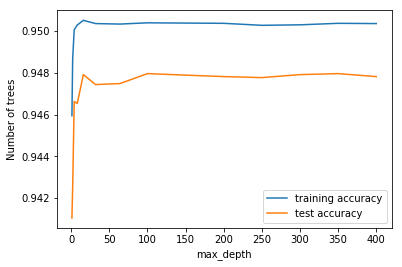

In [411]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Number of trees")
plt.legend()
plt.show()

In [412]:
bst_score = rf.best_score_
bst_hp   = rf.best_params_
print("best Score", bst_score)
print("Best Parameter", bst_hp)

best Score 0.9479573373964384
Best Parameter {'n_estimators': 100}


## Tuning max_features

In [422]:
##### Tuning max_features

# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=6)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [423]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.311007,0.103197,0.011998,0.000002,30,{'max_features': 30},0.947632,0.945013,0.950012,0.948095,0.949035,0.947957,0.001684,5,0.951134,0.952622,0.951074,0.951791,0.951675,0.951659,0.000559
1,1.412450,0.027418,0.013601,0.001956,35,{'max_features': 35},0.947393,0.945965,0.951678,0.947381,0.947368,0.947957,0.001940,5,0.953158,0.951908,0.951670,0.952030,0.951080,0.951969,0.000678
2,1.635366,0.027581,0.011994,0.000008,40,{'max_features': 40},0.948346,0.944299,0.950726,0.947381,0.946892,0.947529,0.002086,11,0.953574,0.954884,0.951670,0.952565,0.951973,0.952933,0.001172
3,1.797793,0.012566,0.011999,0.000002,45,{'max_features': 45},0.948822,0.944299,0.950488,0.949048,0.949035,0.948338,0.002105,1,0.952800,0.954586,0.952741,0.952446,0.952985,0.953112,0.000757
4,1.985902,0.007418,0.011995,0.000007,50,{'max_features': 50},0.947393,0.942395,0.950250,0.947857,0.949274,0.947434,0.002716,13,0.953098,0.954884,0.952027,0.952922,0.952508,0.953088,0.000971


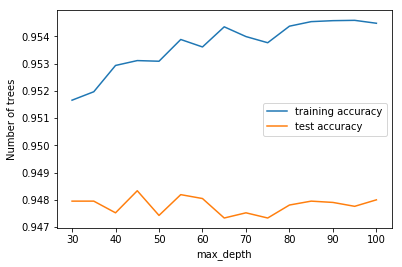

In [424]:
# plotting accuracies with max_Feature
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Number of trees")
plt.legend()
plt.show()

In [425]:
bst_score = rf.best_score_
bst_hp   = rf.best_params_
print("best Score", bst_score)
print("Best Parameter", bst_hp)

best Score 0.9483382534996667
Best Parameter {'max_features': 45}


## GridSearchCV to find optimal min_samples_leaf

In [431]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [432]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.331337,0.073133,0.017596,0.001959,1,{'min_samples_leaf': 1},0.944299,0.940014,0.945727,0.945238,0.944272,0.943910,0.002026,7,0.992798,0.993215,0.993274,0.993037,0.993394,0.993144,0.000208
1,0.815777,0.021319,0.015121,0.001569,51,{'min_samples_leaf': 51},0.945727,0.942157,0.949060,0.945000,0.945701,0.945529,0.002200,2,0.947622,0.948158,0.946848,0.947506,0.948045,0.947636,0.000464
2,0.726221,0.024338,0.013594,0.001956,101,{'min_samples_leaf': 101},0.946203,0.943347,0.950488,0.946667,0.946416,0.946624,0.002276,1,0.947384,0.947860,0.947801,0.948042,0.947390,0.947695,0.000264
3,0.655834,0.017885,0.012801,0.001598,151,{'min_samples_leaf': 151},0.944537,0.942395,0.950726,0.943810,0.945463,0.945386,0.002852,3,0.945479,0.945896,0.946134,0.945721,0.943998,0.945446,0.000755
4,0.601447,0.016890,0.011198,0.001600,201,{'min_samples_leaf': 201},0.945489,0.941204,0.948108,0.944524,0.943796,0.944624,0.002248,6,0.945539,0.946908,0.945063,0.946256,0.944653,0.945684,0.000812


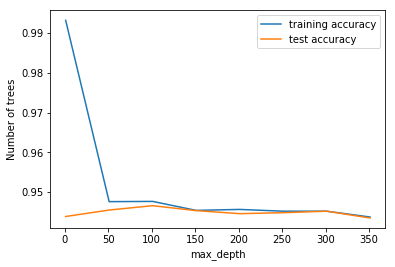

In [433]:
# plotting accuracies with Min Sample leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Number of trees")
plt.legend()
plt.show()

In [434]:
bst_score = rf.best_score_
bst_hp   = rf.best_params_
print("best Score", bst_score)
print("Best Parameter", bst_hp)

best Score 0.9466241310351395
Best Parameter {'min_samples_leaf': 101}


In [435]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score = True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [436]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.213541,0.067256,0.016794,0.001592,100,{'min_samples_split': 100},0.946441,0.944775,0.949060,0.946905,0.947130,0.946862,0.001374,3,0.950955,0.951610,0.950062,0.951970,0.951080,0.951136,0.000649
1,1.154106,0.052239,0.015198,0.002992,150,{'min_samples_split': 150},0.947632,0.943823,0.949298,0.946905,0.946178,0.946767,0.001799,4,0.949884,0.949527,0.948991,0.950006,0.950366,0.949755,0.000467
2,1.114920,0.041973,0.014397,0.001958,200,{'min_samples_split': 200},0.947155,0.942633,0.951440,0.947619,0.946416,0.947053,0.002812,2,0.949289,0.947741,0.947027,0.949292,0.949235,0.948517,0.000952
3,1.119719,0.043590,0.015198,0.002992,250,{'min_samples_split': 250},0.946917,0.941919,0.950964,0.946190,0.946892,0.946577,0.002875,6,0.948872,0.947206,0.947146,0.948399,0.947450,0.947814,0.000694
4,1.095720,0.040936,0.014397,0.001958,300,{'min_samples_split': 300},0.944537,0.946917,0.949060,0.948333,0.947368,0.947243,0.001545,1,0.947146,0.948753,0.946015,0.949054,0.946736,0.947541,0.001174


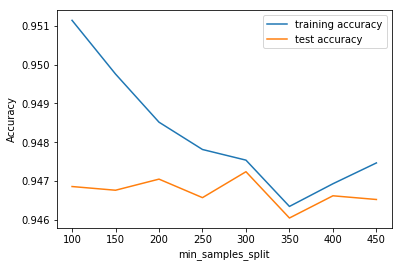

In [437]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [438]:
bst_score = rf.best_score_
bst_hp   = rf.best_params_
print("best Score", bst_score)
print("Best Parameter", bst_hp)

best Score 0.9472431197028854
Best Parameter {'min_samples_split': 300}


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=101, 
                             min_samples_split=300,
                             max_features=45,
                             n_estimators=100)

In [99]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=101, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
# predict
predictions = rfc.predict(X_test)

### evaluation metrics

In [101]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8240
           1       0.77      0.57      0.65       761

    accuracy                           0.95      9001
   macro avg       0.87      0.77      0.81      9001
weighted avg       0.94      0.95      0.95      9001



In [102]:
print(confusion_matrix(y_test,predictions))

[[8113  127]
 [ 331  430]]


In [146]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8240
           1       0.77      0.57      0.65       761

    accuracy                           0.95      9001
   macro avg       0.87      0.77      0.81      9001
weighted avg       0.94      0.95      0.95      9001



In [148]:
## False Positive rate
## True Positive rate
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, predictions)
print("false_positive_rate", false_positive_rate[1])
print("true_positive_rate" ,  true_positive_rate[1])

false_positive_rate 0.015412621359223302
true_positive_rate 0.5650459921156373


## Find most important Features

In [103]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=6,
                                                 max_features=45,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=101,
                                                 min_samples_split=300,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
                                                 warm_

In [104]:
sel.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [105]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

18

## Best Features

In [106]:
print(selected_feat)

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_8'], dtype='object')


In [122]:
# Print the name and gini importance of each feature
imp_feature = {}
for feature , k in zip(X_train.columns, rfc.feature_importances_):
    #print(feature[1])
    imp_feature[feature] = k

print(imp_feature)
    

{'arpu_6': 0.0012994548853216923, 'arpu_7': 0.0012632223096890644, 'arpu_8': 0.04188451691123369, 'onnet_mou_6': 0.00014509457504313802, 'onnet_mou_7': 0.0008607735949411546, 'onnet_mou_8': 0.0008981958518102002, 'offnet_mou_6': 0.0007579916444776236, 'offnet_mou_7': 0.0005862711669187051, 'offnet_mou_8': 0.0017190117102649652, 'roam_ic_mou_6': 8.733639216293024e-05, 'roam_ic_mou_7': 0.002173711028144072, 'roam_ic_mou_8': 0.007960447365825084, 'roam_og_mou_6': 4.888702053889471e-05, 'roam_og_mou_7': 0.001808890476547824, 'roam_og_mou_8': 0.017086540821541277, 'loc_og_t2t_mou_6': 0.00011020879574668624, 'loc_og_t2t_mou_7': 0.00036627230084827083, 'loc_og_t2t_mou_8': 0.004558846455379144, 'loc_og_t2m_mou_6': 0.0004789474980706076, 'loc_og_t2m_mou_7': 0.0003205085665856399, 'loc_og_t2m_mou_8': 0.03011488923334987, 'loc_og_t2f_mou_6': 0.00018600806445141264, 'loc_og_t2f_mou_7': 7.70956386720172e-06, 'loc_og_t2f_mou_8': 0.00016501118203071362, 'loc_og_t2c_mou_6': 0.0, 'loc_og_t2c_mou_7': 3.

In [127]:
imp_feature_df = pd.DataFrame(list(imp_feature.items()))
imp_feature_df


,0,1
0,arpu_6,1.299455e-03
1,arpu_7,1.263222e-03
2,arpu_8,4.188452e-02
3,onnet_mou_6,1.450946e-04
4,onnet_mou_7,8.607736e-04
5,onnet_mou_8,8.981959e-04
6,offnet_mou_6,7.579916e-04
7,offnet_mou_7,5.862712e-04
8,offnet_mou_8,1.719012e-03
9,roam_ic_mou_6,8.733639e-05


In [128]:
imp_feature_df.columns = ['Feature_name', 'Feature_value']
imp_feature_df

,Feature_name,Feature_value
0,arpu_6,1.299455e-03
1,arpu_7,1.263222e-03
2,arpu_8,4.188452e-02
3,onnet_mou_6,1.450946e-04
4,onnet_mou_7,8.607736e-04
5,onnet_mou_8,8.981959e-04
6,offnet_mou_6,7.579916e-04
7,offnet_mou_7,5.862712e-04
8,offnet_mou_8,1.719012e-03
9,roam_ic_mou_6,8.733639e-05


In [139]:
imp_feature_df['Feature_value'] = imp_feature_df.Feature_value.round(2)
imp_feature_df.sort_values('Feature_value', ascending = False, inplace= True)

In [144]:
imp_feature_df=imp_feature_df.head(20)
imp_feature_df

,Feature_name,Feature_value
80,total_ic_mou_8,0.28
65,loc_ic_mou_8,0.17
59,loc_ic_t2m_mou_8,0.14
53,total_og_mou_8,0.10
2,arpu_8,0.04
98,max_rech_amt_8,0.03
29,loc_og_mou_8,0.03
20,loc_og_t2m_mou_8,0.03
14,roam_og_mou_8,0.02
95,total_rech_amt_8,0.02


In [ ]:
## ## Barplot with confidence intervals
height = imp_feature_df['Feature_value']
bars = imp_feature_df['Feature_name']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reducti

## Best Features

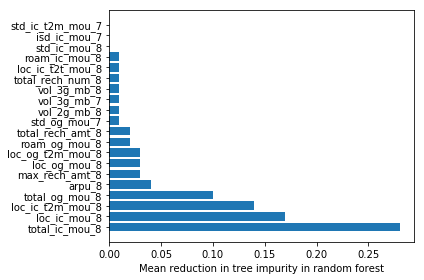

In [143]:
## Barplot with confidence intervals
height = imp_feature_df['Feature_value']
bars = imp_feature_df['Feature_name']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in random forest")

plt.tight_layout()
# Show graphic
plt.show()


In [117]:
# features that have an importance of more than 0.15
sfm = SelectFromModel(rfc, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=6,
                                                 max_features=45,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=101,
                                                 min_samples_split=300,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
                                                 warm_

In [118]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

total_og_mou_8
loc_ic_t2m_mou_8
loc_ic_mou_8
total_ic_mou_8
